In [56]:
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import StandardScaler
import GPy

In [57]:
os.chdir('/home/saumya/Documents/Flame_dianostics-temperature_profile_estimation_using_ML-main/spec_data/New_final')

In [58]:
x_dat = np.load('ABS_noisy_SNR_new.npy').astype(np.half)
# x_dat = np.reshape(x_dat, -1)[:, None]

In [59]:
x_dat.shape

(12500, 3000)

In [60]:
x_dat

array([[3.600e-05, 3.844e-05, 2.837e-05, ..., 4.733e-05, 5.478e-05,
        4.387e-05],
       [2.068e-05, 2.652e-05, 2.497e-05, ..., 6.682e-05, 7.761e-05,
        5.633e-05],
       [1.049e-05, 4.423e-05, 2.927e-05, ..., 7.147e-05, 1.000e-04,
        7.272e-05],
       ...,
       [9.294e-04, 7.172e-04, 2.909e-05, ..., 7.749e-04, 3.695e-04,
        5.455e-04],
       [2.177e-04, 8.788e-04, 4.585e-04, ..., 5.589e-04, 7.362e-04,
        8.240e-04],
       [8.302e-04, 3.266e-04, 6.490e-04, ..., 9.861e-04, 4.880e-04,
        7.000e-04]], dtype=float16)

In [61]:
os.chdir('/home/saumya/Documents/data/snr')

In [62]:
y_dat_std = np.load('param_SNR.npy')

# y_dat = np.reshape(y_dat, -1)[:, None]

# y_dat = y_dat[:10000]

In [63]:
y_dat_std.shape

(12500, 3)

In [65]:
y_dat = y_dat_transform.transform(y_dat_std)

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
def train_val_test_split(X, y, val_size):
    # test_size = 1 - train_size - val_size
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = val_size)
    # relative_train_size = train_size / (val_size + train_size)
    # X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                    #   train_size = relative_train_size, test_size = 1-relative_train_size)
    return X_train_val, X_test, y_train_val, y_test

In [68]:
X_train, X_test, Y_train, Y_test = train_val_test_split(x_dat, y_dat, .2)

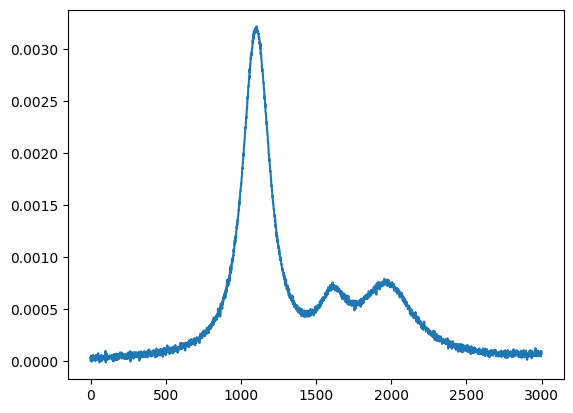

In [69]:
plt.plot(x_dat[2])

In [70]:
# LMC set up
ks = [GPy.kern.RBF(np.shape(X_train)[1]) for i in range(1)]
icm = GPy.util.multioutput.LCM(input_dim=np.shape(X_train)[1],num_outputs=1,kernels_list=ks)

In [71]:
print(icm)
# print('W matrix\n',icm.B.W)
# print('\nkappa vector\n',icm.B.kappa)
# print('\nB matrix\n',icm.B.B)

  ICM0.            |          value  |  constraints  |  priors
  rbf.variance     |            1.0  |      +ve      |        
  rbf.lengthscale  |            1.0  |      +ve      |        
  B.W              |  [-0.68419873]  |               |        
  B.kappa          |            0.5  |      +ve      |        


In [72]:
[Y_train[:,:-1], Y_train[:,-1]]

[array([[ 7.983e-01, -2.747e-04],
        [-5.889e-01, -2.747e-04],
        [-6.572e-01,  7.070e-01],
        ...,
        [-7.280e-01, -7.070e-01],
        [ 5.889e-01, -2.747e-04],
        [ 8.667e-01,  1.415e+00]], dtype=float16),
 array([-1.213 , -1.352 ,  1.628 , ..., -0.1736, -1.559 ,  0.7275],
       dtype=float16)]

In [73]:
# m = GPy.models.GPCoregionalizedRegression([X_train, X_train, X_train],[np.reshape(Y_train[:, 0], -1)[:, None], np.reshape(Y_train[:, 1], -1)[:, None], np.reshape(Y_train[:, 2], -1)[:, None]],kernel=icm)


In [74]:
m = GPy.models.GPCoregionalizedRegression([X_train],[Y_train],kernel=icm)
m['.*rbf.var'].constrain_fixed(1.)
# constrain if converge to reasonless extrema
# m['mixed_noise.Gaussian_noise_0.variance'].constrain_bounded(0,1e-5)
# m['mixed_noise.Gaussian_noise_1.variance'].constrain_bounded(0,1e-5)
# m['mixed_noise.Gaussian_noise_2.variance'].constrain_bounded(0,1e-5)
print(m)


Name : gp
Objective : 37779.972113157346
Number of Parameters : 5
Number of Optimization Parameters : 4
Updates : True
Parameters:
  gp.                                    |          value  |  constraints  |  priors
  ICM0.rbf.variance                      |            1.0  |   +ve fixed   |        
  ICM0.rbf.lengthscale                   |            1.0  |      +ve      |        
  ICM0.B.W                               |  [-0.68419873]  |               |        
  ICM0.B.kappa                           |            0.5  |      +ve      |        
  mixed_noise.Gaussian_noise_0.variance  |            1.0  |      +ve      |        


In [75]:
# print('W matrix\n',icm.B.W)
# print('\nkappa vector\n',icm.B.kappa)

In [76]:
m.optimize(messages=True)

In [ ]:
print(m)
# print('W matrix\n',icm.B.W)
# print('\nkappa vector\n',icm.B.kappa)
# print('\nB matrix\n',icm.B.B)


Name : gp
Objective : 30054.088728678133
Number of Parameters : 5
Number of Optimization Parameters : 4
Updates : True
Parameters:
  gp.                                    |                value  |  constraints  |  priors
  ICM0.rbf.variance                      |                  1.0  |   +ve fixed   |        
  ICM0.rbf.lengthscale                   |  0.05206268728672002  |      +ve      |        
  ICM0.B.W                               |        [-1.87478502]  |               |        
  ICM0.B.kappa                           |   0.6897713012814027  |      +ve      |        
  mixed_noise.Gaussian_noise_0.variance  |  0.38146064466621965  |      +ve      |        


In [ ]:
newX = X_test

In [ ]:
newX = np.concatenate((newX,np.zeros((np.shape(X_test)[0],1))),1)
noise_dict = {'output_index':newX[:,-1].astype(int)}
ys,var=m.predict(newX,Y_metadata=noise_dict)

# Temper_test_=scalerT.inverse_transform(ys)


In [ ]:
ys

array([[-1.33135657,  0.05075283,  0.2271048 ],
       [-0.18743303,  0.16328018,  1.56966306],
       [ 0.74175681, -0.10976807,  1.16581956],
       ...,
       [ 0.31504306, -0.01918896, -1.34611377],
       [ 1.2696924 , -0.01851441, -0.21881713],
       [-0.53058283,  0.02261122,  1.16366932]])

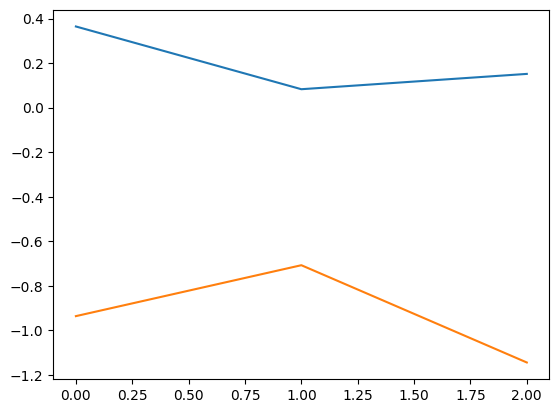

In [ ]:
plt.plot(ys[1030])

plt.plot(Y_train[1030])

In [ ]:
ys

array([[-1.33135657,  0.05075283,  0.2271048 ],
       [-0.18743303,  0.16328018,  1.56966306],
       [ 0.74175681, -0.10976807,  1.16581956],
       ...,
       [ 0.31504306, -0.01918896, -1.34611377],
       [ 1.2696924 , -0.01851441, -0.21881713],
       [-0.53058283,  0.02261122,  1.16366932]])

In [ ]:
Y_test

array([[-1.282e+00,  7.070e-01,  3.479e-02],
       [-1.733e-01, -2.747e-04,  1.698e+00],
       [ 7.261e-01, -7.070e-01,  1.145e+00],
       ...,
       [ 1.047e-01, -1.414e+00, -1.144e+00],
       [ 1.214e+00, -1.414e+00, -1.736e-01],
       [-5.200e-01, -1.414e+00,  1.214e+00]], dtype=float16)

In [ ]:
from sklearn import metrics

In [ ]:
conc_1 = metrics.mean_squared_error(np.array(ys[:, 1]), np.array(Y_test[:, 1]))
print(f'The mean squared error between the real and predicted values are: {conc_1}')

The mean squared error between the real and predicted values are: 1.0100054404104133


In [ ]:
conc_1 = metrics.mean_squared_error(np.array(ys[:, 2]), np.array(Y_test[:, 2]))
print(f'The mean squared error between the real and predicted values are: {conc_1}')

The mean squared error between the real and predicted values are: 0.13359799001076508


In [ ]:
conc_1 = metrics.mean_squared_error(np.array(ys[:, 0]), np.array(Y_test[:, 0]))
print(f'The mean squared error between the real and predicted values are: {conc_1}')

The mean squared error between the real and predicted values are: 0.07755413270335845


In [ ]:
metrics.mean_squared_error(ys, Y_test)

0.4070525210415132